In [1]:
import scanpy as sc
import scvelo as scv
import numpy as np
import seaborn as sns
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity


SEED = 2024
np.random.seed(SEED)

In [2]:
# adata_hsc_raw = dyn.sample_data.hematopoiesis_raw()
# adata_hsc_raw
# "https://www.dropbox.com/s/rvkxvq8694xnxz3/hsc_raw_with_metadata.h5ad?dl=1"

In [3]:
# adata_hsc_raw = sc.read_h5ad('./data/hsc_raw_with_metadata.h5ad')
adata_hsc = sc.read_h5ad("scNT_HSC.h5ad")
print(adata_hsc)
adata_hsc.obsm['scNT_velocity_umap'] = adata_hsc.obsm['velocity_umap'].copy()

AnnData object with n_obs × n_vars = 1947 × 21705
    obs: 'batch', 'cell_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'ntr'
    var: 'gene_name_mapping', 'query', 'scopes', '_id', '_score', 'symbol', 'nCells', 'nCounts', 'pass_basic_filter', 'score'
    uns: 'PCs', 'batch_colors', 'cell_type_colors', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'genes_to_use', 'grid_velocity_umap', 'neighbors', 'pca_mean', 'pp', 'velocyto_SVR'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'M_n', 'M_nn', 'M_s', 'M_ss', 'M_t', 'M_tn', 'M_tt', 'M_u', 'M_us', 'M_uu', 'X_new', 'X_spliced', 'X_total', 'X_unspliced', 'new', 'spliced', 'total', 'unspliced', 'velocity_N', 'velocity_T', 'velocity_alpha_minus_gamma_s'
    obsp: 'con

In [4]:
# filter genes as dynamo
adata = adata_hsc.copy()
# v = adata.layers["velocity_alpha_minus_gamma_s"].toarray()
# cols_to_keep_0 = np.any(v != 0, axis=0)
# cols_to_keep_na = ~np.isnan(v).any(axis=0)
# adata = adata[:,cols_to_keep_0 & cols_to_keep_na]
# print(adata)

saving figure to file Figure/stream/scNT.svg


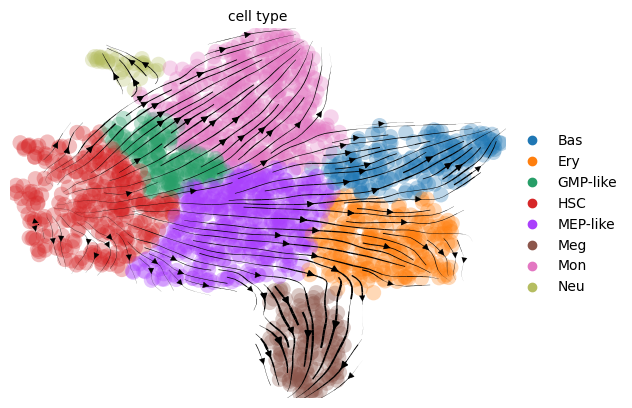

In [5]:
scv.pl.velocity_embedding_stream(adata_hsc,basis= "umap",color="cell_type",
                                 palette = sc.pl.palettes.default_20,
                                 legend_loc = 'right margin',
                                 save="Figure/stream/" + "scNT.svg" )

### process

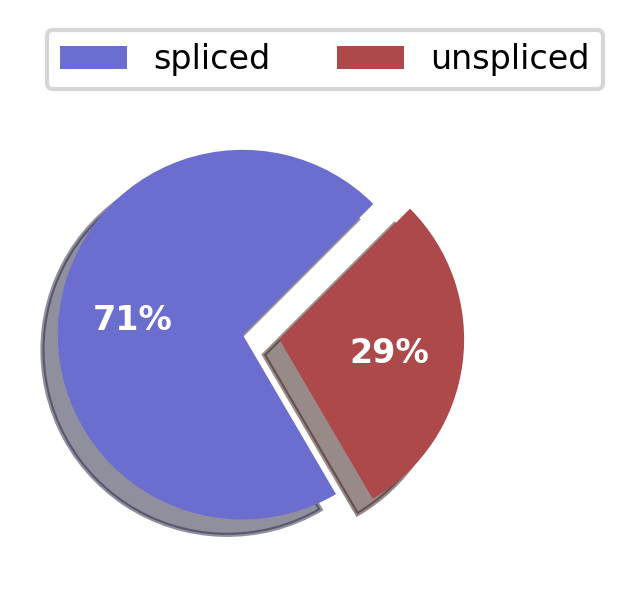

Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [6]:
scv.pl.proportions(adata,dpi=300)
scv.pp.filter_and_normalize(adata,n_top_genes=2000)
scv.pp.moments(adata)

In [7]:
adata.write_h5ad("/media/liyaru/LYR/Diff_change/8_dynamo_Data/scNT_HSC_scvelo_process.h5ad")

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/1947 [00:00<?, ?cells/s]

    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file Figure/stream/scvelo_stochastic.pdf


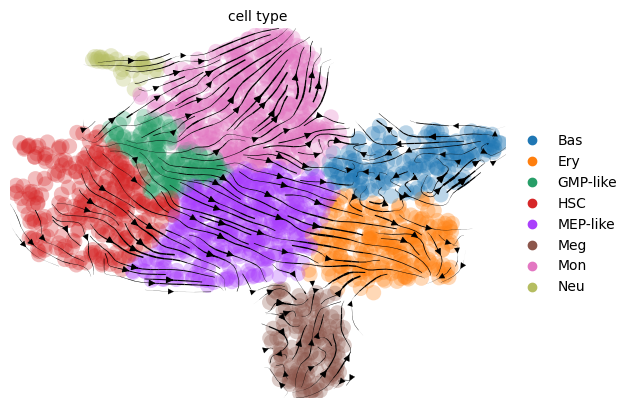

In [8]:
scv.tl.velocity(adata, mode='stochastic')
scv.tl.velocity_graph(adata,vkey="velocity",n_jobs=10,basis= "umap")
scv.pl.velocity_embedding_stream(adata,basis= "umap",color="cell_type",
                                 palette = sc.pl.palettes.default_20,
                                 legend_loc = 'right margin',
                                 save="Figure/stream/" + "scvelo_stochastic.pdf" )

In [9]:
adata.write_h5ad("adata/scvelo_stochastic.h5ad")